In [1]:


# manipulação dos dados
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron


# warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
train = pd.read_csv('./data-titanic/train.csv')
test = pd.read_csv('./data-titanic/test.csv')

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
train['Age'] = round(train['Age'])
train['Fare'] = round(train['Fare'])

train['sex_b'] = train['Sex'].map({'male' :0, 'female' :1})
test['sex_b'] = test['Sex'].map({'male':0, 'female':1})

train.drop(['PassengerId', 'Cabin', 'Sex'], axis=1, inplace=True)

In [30]:
train[train['Age'] == 'NaN' ]

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_b


In [34]:
train[train['Age'].isnull()]

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_b
5,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,Q,0
17,1,2,"Williams, Mr. Charles Eugene",NaN,0,0,244373,13.0000,S,0
19,1,3,"Masselmani, Mrs. Fatima",NaN,0,0,2649,7.2250,C,1
26,0,3,"Emir, Mr. Farred Chehab",NaN,0,0,2631,7.2250,C,0
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",NaN,0,0,330959,7.8792,Q,1
...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",NaN,0,0,2629,7.2292,C,0
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",NaN,8,2,CA. 2343,69.5500,S,1
868,0,3,"van Melkebeke, Mr. Philemon",NaN,0,0,345777,9.5000,S,0
878,0,3,"Laleff, Mr. Kristo",NaN,0,0,349217,7.8958,S,0


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
 9   sex_b     891 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [35]:
ages_faltantes = train[train['Age'].isnull()]
ages_faltantes

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_b
5,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,Q,0
17,1,2,"Williams, Mr. Charles Eugene",NaN,0,0,244373,13.0000,S,0
19,1,3,"Masselmani, Mrs. Fatima",NaN,0,0,2649,7.2250,C,1
26,0,3,"Emir, Mr. Farred Chehab",NaN,0,0,2631,7.2250,C,0
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",NaN,0,0,330959,7.8792,Q,1
...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",NaN,0,0,2629,7.2292,C,0
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",NaN,8,2,CA. 2343,69.5500,S,1
868,0,3,"van Melkebeke, Mr. Philemon",NaN,0,0,345777,9.5000,S,0
878,0,3,"Laleff, Mr. Kristo",NaN,0,0,349217,7.8958,S,0


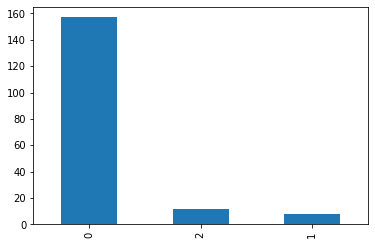

In [36]:
ages_faltantes['Parch'].value_counts().plot(kind='bar');

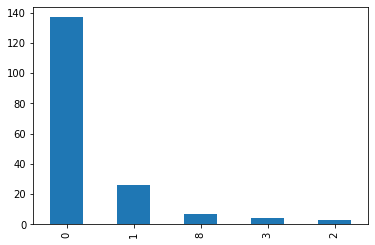

In [37]:
ages_faltantes['SibSp'].value_counts().plot(kind='bar');

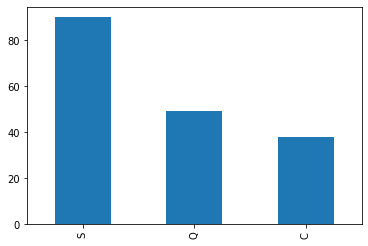

In [38]:
ages_faltantes['Embarked'].value_counts().plot(kind='bar');

In [42]:
train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
CA 2144     6
347088      6
           ..
PP 4348     1
2674        1
324669      1
13213       1
113050      1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
train[['Ticket', 'Survived']].groupby('Ticket').mean().sort_values(by='Survived', ascending=False)

In [43]:
train[train['Ticket']=='1601']

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_b
74,1,3,"Bing, Mr. Lee",32.0,0,0,1601,56.4958,S,0
169,0,3,"Ling, Mr. Lee",28.0,0,0,1601,56.4958,S,0
509,1,3,"Lang, Mr. Fang",26.0,0,0,1601,56.4958,S,0
643,1,3,"Foo, Mr. Choong",NaN,0,0,1601,56.4958,S,0
692,1,3,"Lam, Mr. Ali",NaN,0,0,1601,56.4958,S,0
826,0,3,"Lam, Mr. Len",NaN,0,0,1601,56.4958,S,0
838,1,3,"Chip, Mr. Chang",32.0,0,0,1601,56.4958,S,0


In [39]:
ages_faltantes['Ticket'].value_counts()

CA. 2343             7
4133                 4
371110               3
239853               3
1601                 3
                    ..
SOTON/O.Q. 392087    1
2674                 1
2626                 1
2641                 1
19988                1
Name: Ticket, Length: 155, dtype: int64

In [40]:
ages_faltantes[ages_faltantes['Ticket']== 'CA. 2343']

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_b
159,0,3,"Sage, Master. Thomas Henry",NaN,8,2,CA. 2343,69.55,S,0
180,0,3,"Sage, Miss. Constance Gladys",NaN,8,2,CA. 2343,69.55,S,1
201,0,3,"Sage, Mr. Frederick",NaN,8,2,CA. 2343,69.55,S,0
324,0,3,"Sage, Mr. George John Jr",NaN,8,2,CA. 2343,69.55,S,0
792,0,3,"Sage, Miss. Stella Anna",NaN,8,2,CA. 2343,69.55,S,1
846,0,3,"Sage, Mr. Douglas Bullen",NaN,8,2,CA. 2343,69.55,S,0
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",NaN,8,2,CA. 2343,69.55,S,1


In [19]:
X_train = train.iloc[:, 1:10].values

In [20]:
X_train[0]

array([3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0, 'A/5 21171',
       7.25, 'S'], dtype=object)

In [21]:
y_train = train.iloc[:, 0].values

In [ ]:
y_train

In [4]:
label_encoder_ticket = LabelEncoder()
label_encoder_embarked = LabelEncoder()

In [ ]:
train[:,8] = label_encoder_ticket.fit_transform(train[:,8])
train[:,10] = label_encoder_embarked.fit_transform(train[:,10])

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dados_faltantes = train.isnull().sum()
dados_faltantes

In [ ]:
train2 = train.copy()
train['Age'] = round(train['Age'])
train['Fare'] = round(train['Fare'])

In [ ]:
train

In [ ]:
train['Ticket'].value_counts()

In [ ]:
testeticket = train[train['Ticket'] == 'CA. 2343']
testeticket

In [ ]:
testeticket = train[train['Ticket'] == '347082']
testeticket

In [ ]:
testecorr = train[['Ticket', 'Pclass']]
testecorr

In [ ]:
testecorr.corr()

In [ ]:
train['SibSp'].value_counts().plot(kind='bar');

In [ ]:
train['Embarked'].value_counts().plot(kind='bar');

In [ ]:
train['Parch'].value_counts().plot(kind='bar');

In [ ]:
train2

In [ ]:
train['Age'].value_counts()

In [ ]:
train['Age'].mean(), train['Age'].median()

In [ ]:
fig = px.scatter(ages_faltantes, x='Survived', y='sex_b', color='Pclass')
fig.show()

In [ ]:
ages_faltantes.info()

In [ ]:
ages_faltantes['Pclass'].value_counts()

In [ ]:
fig = px.pie(ages_faltantes, values='Pclass', names='Parch', title='Pessoas com idade faltante')
fig.show()

In [ ]:
train['Age'].plot.hist(bins=30, color='blue', alpha=0.5);

In [ ]:
train.corr()

In [ ]:
train['Cabin']